In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

!python3 transform_data.py

In [2]:
df = pd.read_csv('application_data.csv').drop(['Unnamed: 0'], axis= 1)
df

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,COUNT_LOAN,COUNT_CLOSED_LOAN,MATCH_ADDRESS
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,5588.0,6.0,1000.0,1.0,0.0,1
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,Участие в основ. деятельности,5.0,от 10000 до 20000 руб.,10000.0,19498.0,12.0,0.0,1.0,0.0,1
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,Участие в основ. деятельности,360.0,от 20000 до 50000 руб.,30000.0,15470.0,3.0,15000.0,1.0,1.0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,13960.0,6.0,2500.0,1.0,0.0,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,Участие в основ. деятельности,12.0,от 10000 до 20000 руб.,15000.0,11890.0,6.0,8000.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,...,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,8000.0,11750.0,4.0,1900.0,2.0,2.0,1
15996,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,...,Участие в основ. деятельности,24.0,от 20000 до 50000 руб.,12000.0,12350.0,6.0,1380.0,1.0,0.0,1
15997,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,...,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,9000.0,4915.0,10.0,2000.0,1.0,0.0,1
15998,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,...,Участие в основ. деятельности,36.0,от 10000 до 20000 руб.,12000.0,5860.0,3.0,2000.0,1.0,1.0,1


In [3]:
df.describe()

,ID,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET,WORK_TIME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,COUNT_LOAN,COUNT_CLOSED_LOAN,MATCH_ADDRESS
count,1.600000e+04,16000.000000,16000.00000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.522300e+04,15223.000000,1.385500e+04,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,16000.000000
mean,1.068124e+08,40.394750,0.65325,1.097562,0.644437,0.909375,0.134625,0.310188,0.116562,6.540183e+07,0.119030,2.922120e+02,13853.836323,14667.959345,8.101031,3398.562655,1.387769,0.751889,0.987563
std,4.618946e+03,11.600365,0.47595,0.995731,0.811975,0.287084,0.341333,0.462585,0.321298,4.568181e+06,0.323835,2.436483e+04,9015.467617,12147.873496,4.094090,5158.108934,0.793566,0.988499,0.110831
min,1.068044e+08,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.991015e+07,0.000000,1.000000e+00,24.000000,2000.000000,3.000000,0.000000,1.000000,0.000000,0.000000
25%,1.068084e+08,30.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.192092e+07,0.000000,2.400000e+01,8000.000000,6500.000000,6.000000,1000.000000,1.000000,0.000000,1.000000
50%,1.068124e+08,39.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.437100e+07,0.000000,4.800000e+01,12000.000000,11550.000000,6.000000,2000.000000,1.000000,0.000000,1.000000
75%,1.068164e+08,50.000000,1.00000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,6.708802e+07,0.000000,1.100000e+02,17000.000000,19170.000000,10.000000,4000.000000,2.000000,1.000000,1.000000
max,1.068204e+08,67.000000,1.00000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,7.529224e+07,1.000000,2.867959e+06,250000.000000,119700.000000,36.000000,140000.000000,11.000000,11.000000,1.000000


In [4]:
def draw_pie(column_group: str, title_plot: str, data= df, target= 'TARGET', label_1= None, label_2= None):
    
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(15, 15))
    label_data_1 = list(data[data[target] == 1].groupby(column_group)[column_group].count().index)
    value_data_1 = list(data[data[target] == 1].groupby(column_group)[column_group].count().values)

    label_data = list(data[data[target] == 0].groupby(column_group)[column_group].count().index)
    value_data = list(data[data[target] == 0].groupby(column_group)[column_group].count().values)
    
    if len(label_data) == 2:
        label_data[0], label_data[1] = label_1, label_2
        label_data_1[0], label_data_1[1] = label_1, label_2

    axs[0].pie(value_data, labels= label_data, autopct='%1.1f%%')
    axs[1].pie(value_data_1, labels= label_data_1, autopct='%1.1f%%')
    
    axs[0].set_title(f'{title_plot} из НЕ воспользовавшихся ')
    axs[1].set_title(f'{title_plot} из воспользовавшихся ')
    plt.show()



def draw_hist(column_group: str, title_plot: str, data= df, target= 'TARGET', label_1= 'Не воспользовались', label_2= 'Воспользовались'):
    plt.hist(data[column_group], label= 'Всего')
    plt.hist(data[data[target] == 0][column_group], label= label_1)
    plt.hist(data[data[target] == 1][column_group], label= label_2)

    plt.xlabel(title_plot)
    plt.title(f'{title_plot} клиентов')
    plt.legend()
    plt.show()



def draw_barh(column_group: str, title_plot: str, data= df, target= 'TARGET', label_1= "Не воспользовались", label_2= 'Воспользовались'):
    
    label_data_1 = list(data[data[target] == 1].groupby(column_group)[column_group].count().index)
    value_data_1 = list(data[data[target] == 1].groupby(column_group)[column_group].count().values)

    label_data = list(data[data[target] == 0].groupby(column_group)[column_group].count().index)
    value_data = list(data[data[target] == 0].groupby(column_group)[column_group].count().values)

    fig, ax = plt.subplots(figsize =(10, 5))
    plt.barh(label_data, value_data, label= label_1)
    plt.barh(label_data_1, value_data_1, label= label_2)

    if len(label_data) < 10:
        count = 0
        for i in ax.patches:
            if count < len(ax.patches)/2:
                plt.text(
                    i.get_width() + 100,
                    i.get_y() + 0.15, 
                    str(round((i.get_width()), 2)),
                    color= 'grey'
                    )
            else:
                plt.text(
                    i.get_width() + 100,
                    i.get_y() + 0.45, 
                    str(round((i.get_width()), 2)),
                    color= 'black'
                    )
            count += 1

    ax.set_title(f'{title_plot} клиентов',
                loc= 'left')
                
    ax.legend(title= "Отклик клиентов")
    plt.show()

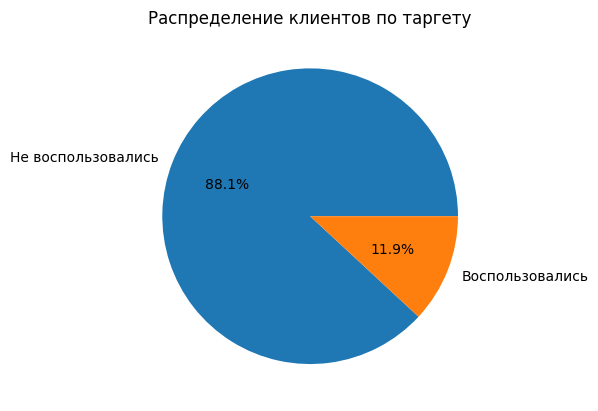

In [5]:
label_target = list(df.groupby('TARGET')['TARGET'].count().index)
label_target[0] = 'Не воспользовались'
label_target[1] = 'Воспользовались'
value_target = list(df.groupby('TARGET')['TARGET'].count().values)

plt.pie(value_target, labels=label_target, autopct='%1.1f%%')
plt.title("Распределение клиентов по таргету")
plt.show()

In [6]:
# числовые признаки 
num_features_df = [i for i in df.columns if (df[i].dtype == 'int') | (df[i].dtype == 'float')]
num_features_df.remove('ID')

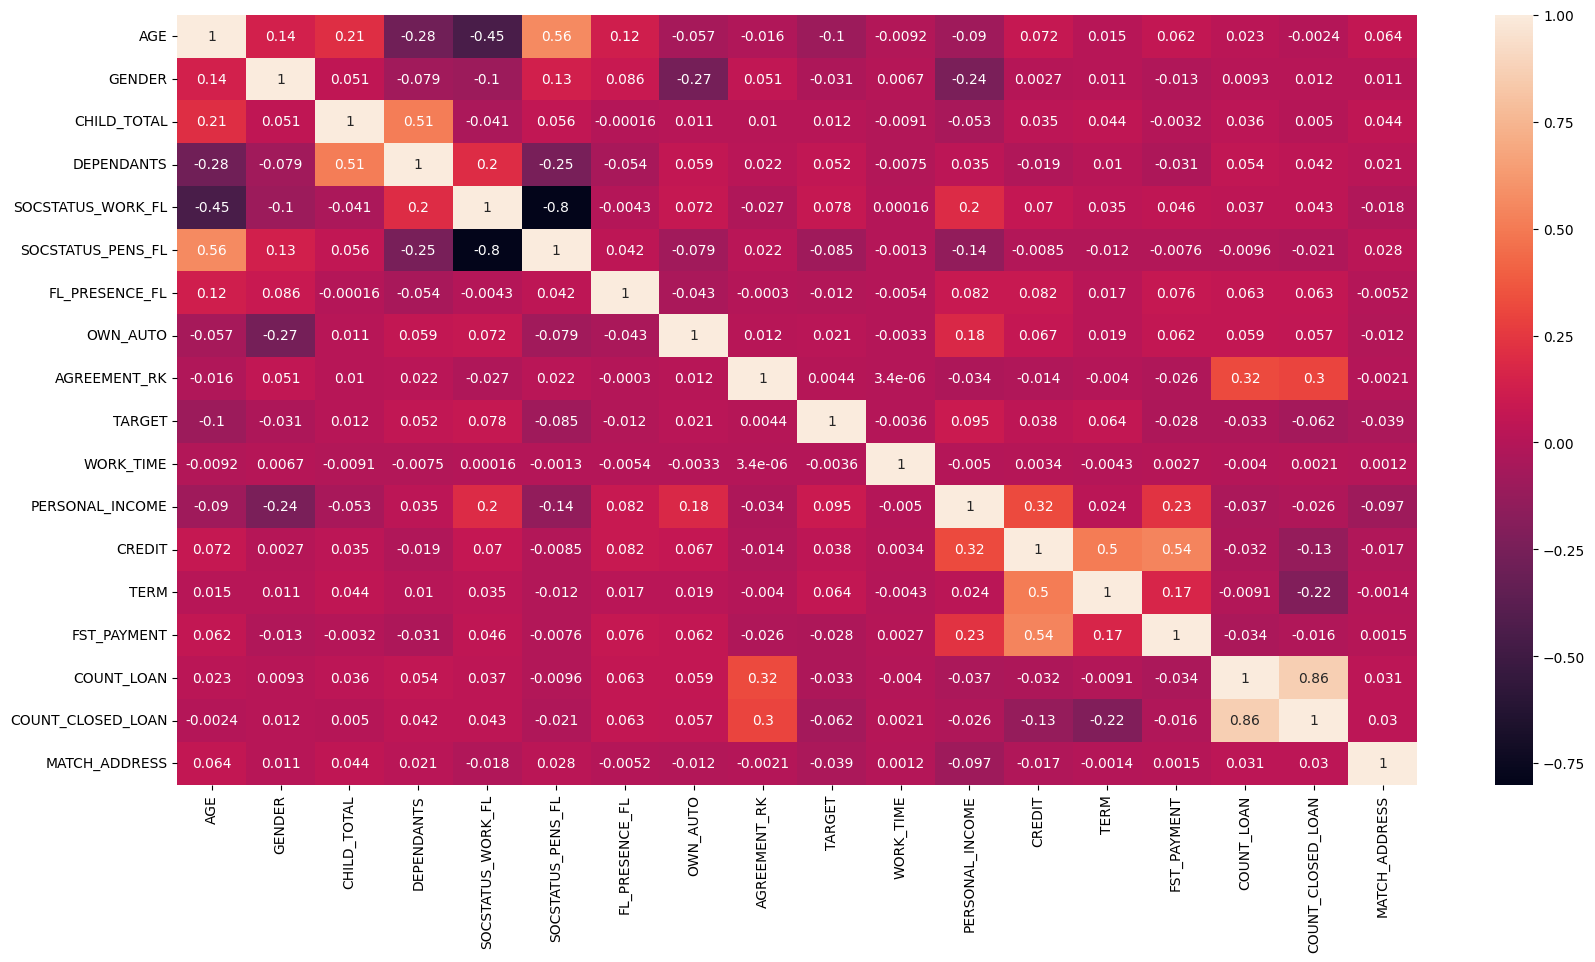

In [7]:
int_float_features = df[num_features_df]
corr_matrix_int_float = int_float_features.corr()
figure, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix_int_float, annot=True, ax=ax);

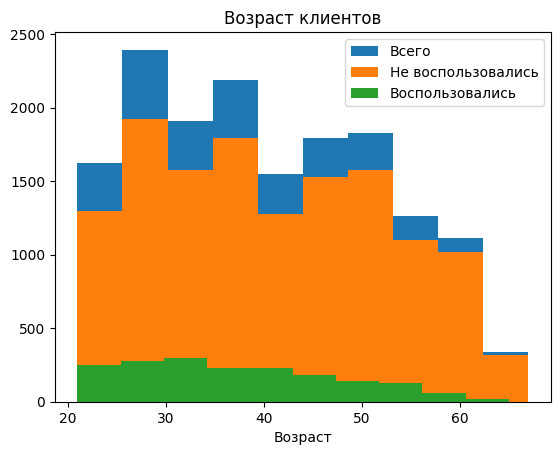

In [8]:
draw_hist(
    column_group= 'AGE',
    title_plot= 'Возраст'
    )

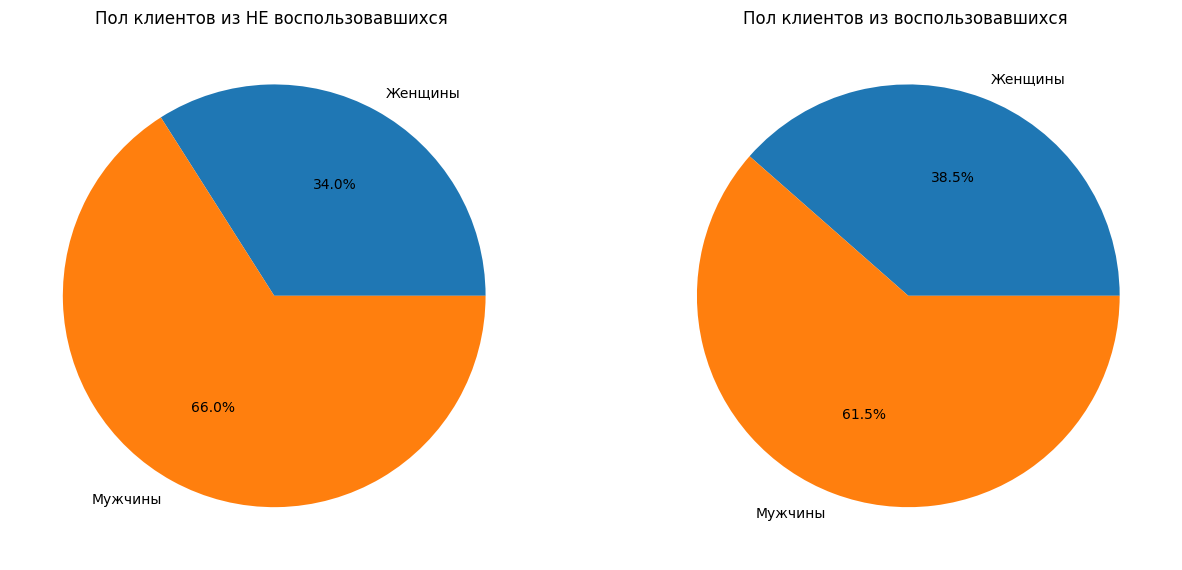

In [9]:
draw_pie(
    column_group= 'GENDER',
    title_plot= 'Пол клиентов',
    label_1= 'Женщины',
    label_2= 'Мужчины'
    )

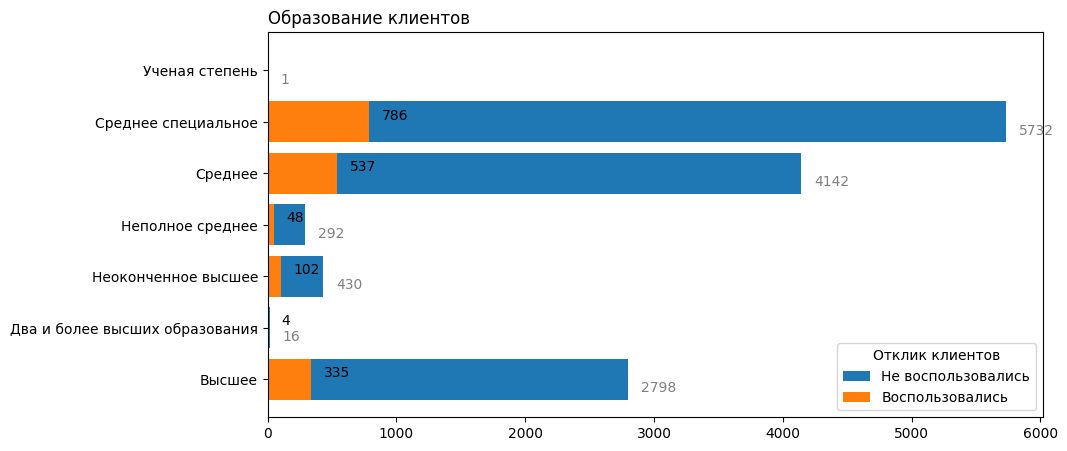

In [10]:
draw_barh(
    column_group= 'EDUCATION', 
    title_plot= 'Образование'
    )

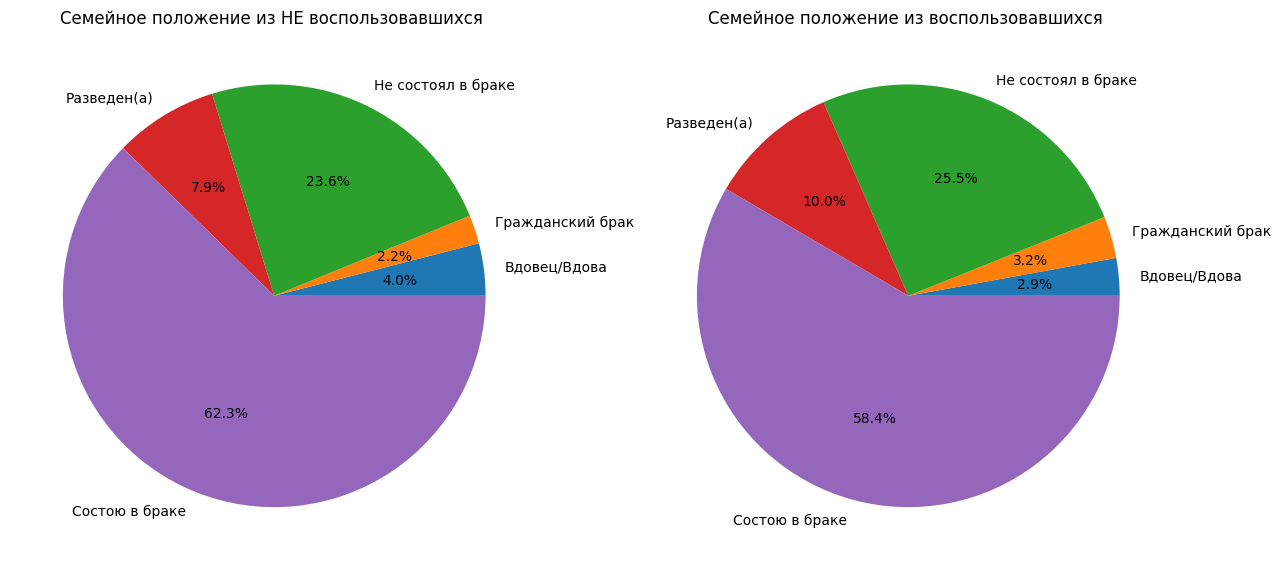

In [11]:
draw_pie(
    column_group= 'MARITAL_STATUS',
    title_plot= 'Семейное положение'
    )

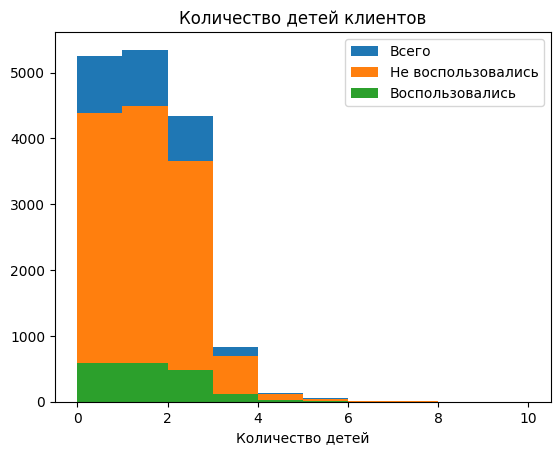

In [12]:
draw_hist(
    column_group= 'CHILD_TOTAL',
    title_plot= 'Количество детей'
    )

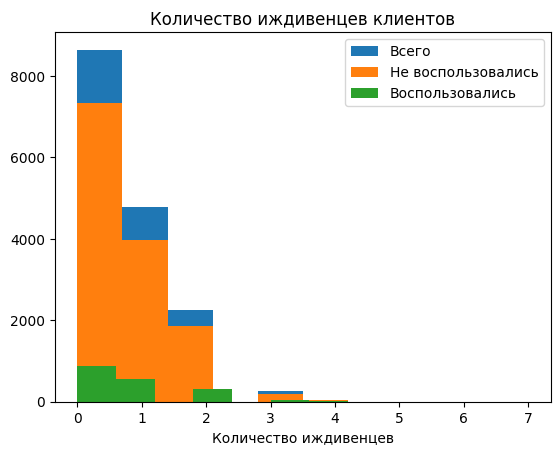

In [13]:
draw_hist(
    column_group= 'DEPENDANTS',
    title_plot= 'Количество иждивенцев'
    )

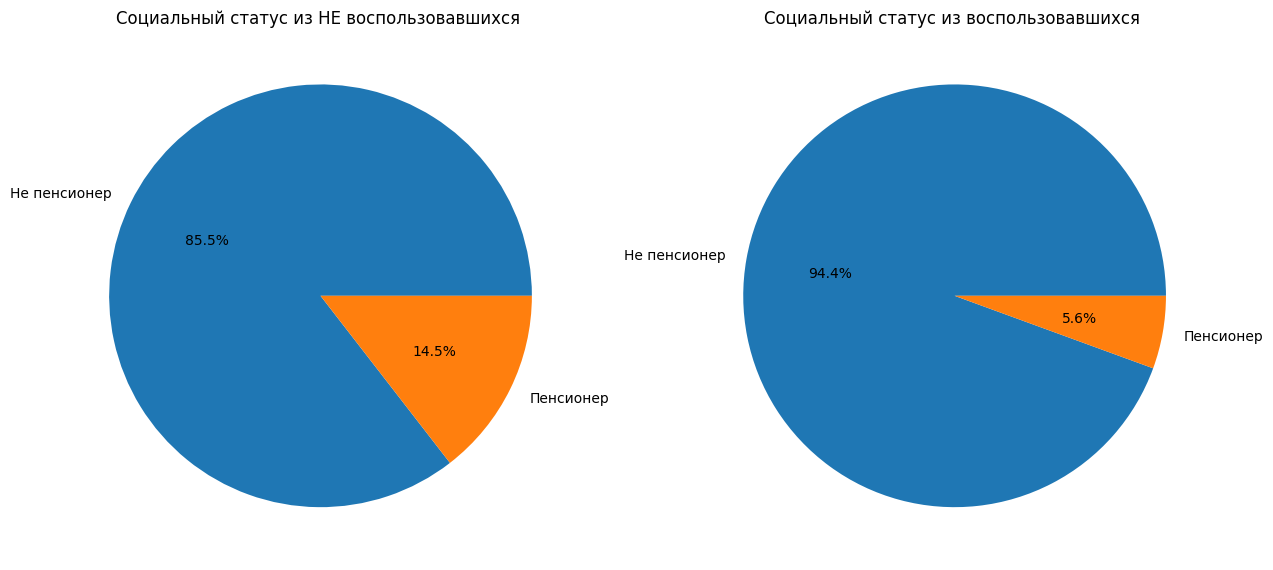

In [14]:
draw_pie(
    column_group= 'SOCSTATUS_PENS_FL',
    title_plot= 'Социальный статус',
    label_1= 'Не пенсионер',
    label_2= 'Пенсионер'
    )

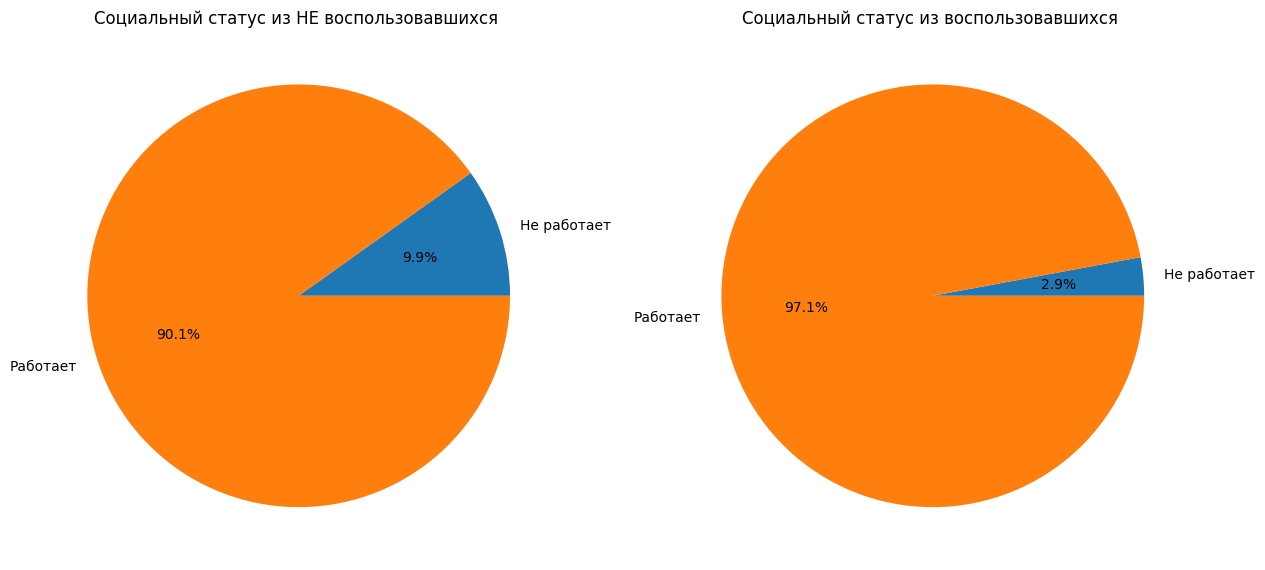

In [15]:
draw_pie(
    column_group= 'SOCSTATUS_WORK_FL',
    title_plot= 'Социальный статус',
    label_1= 'Не работает',
    label_2= 'Работает',
    )

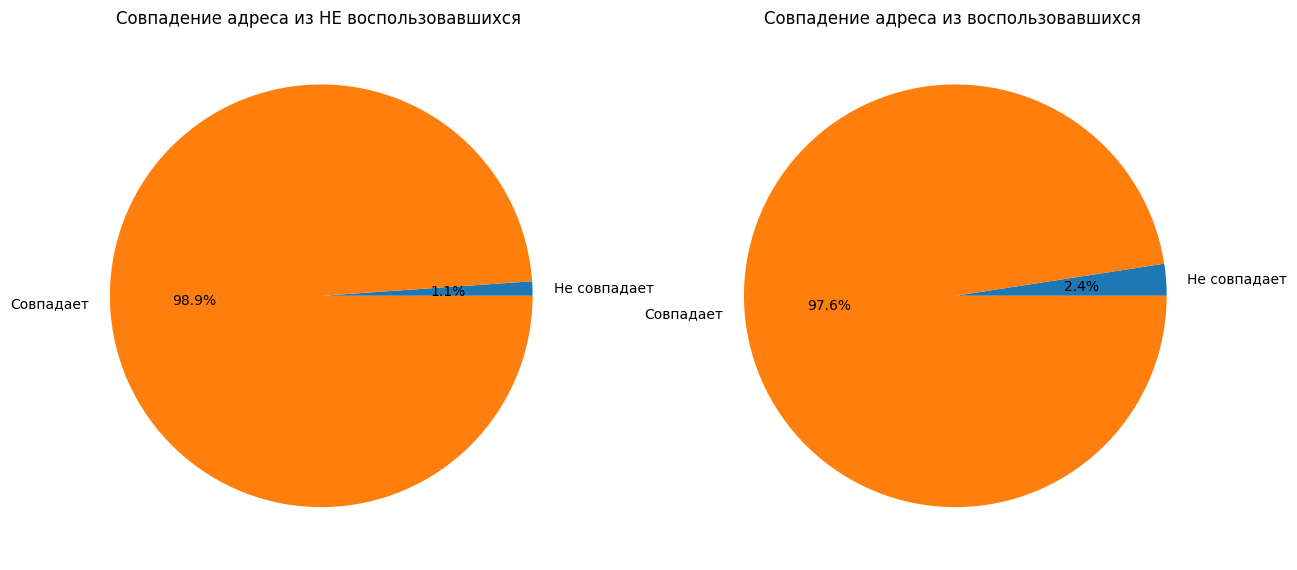

In [16]:
draw_pie(
    column_group= 'MATCH_ADDRESS',
    title_plot= 'Совпадение адреса',
    label_1= 'Не совпадает',
    label_2= 'Совпадает',
    )

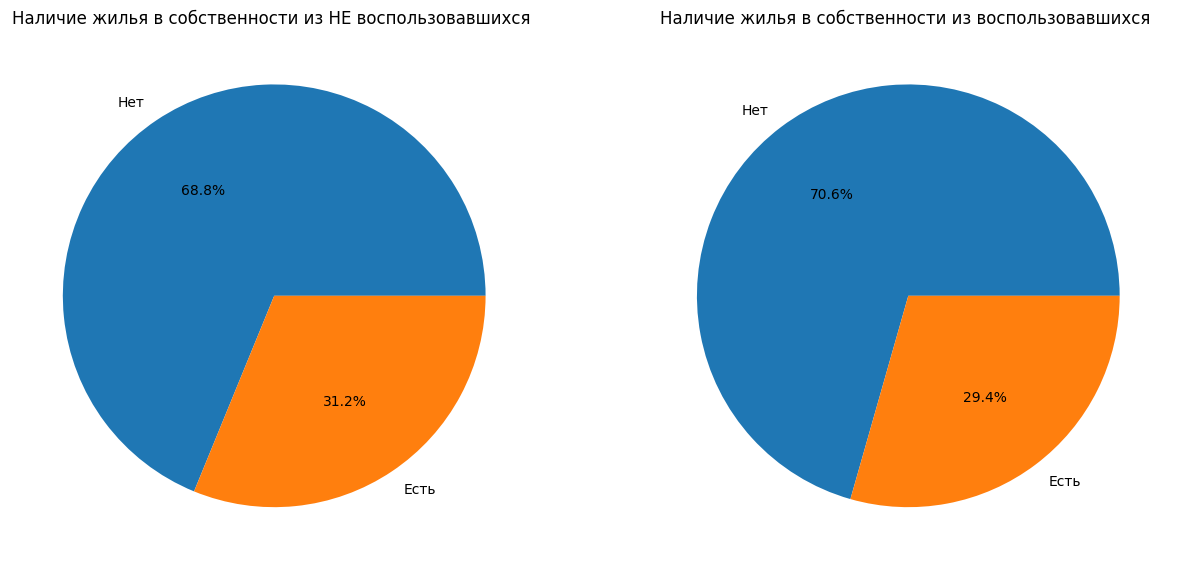

In [17]:
draw_pie(
    column_group= 'FL_PRESENCE_FL',
    title_plot= 'Наличие жилья в собственности',
    label_1= 'Нет',
    label_2= 'Есть',
    )

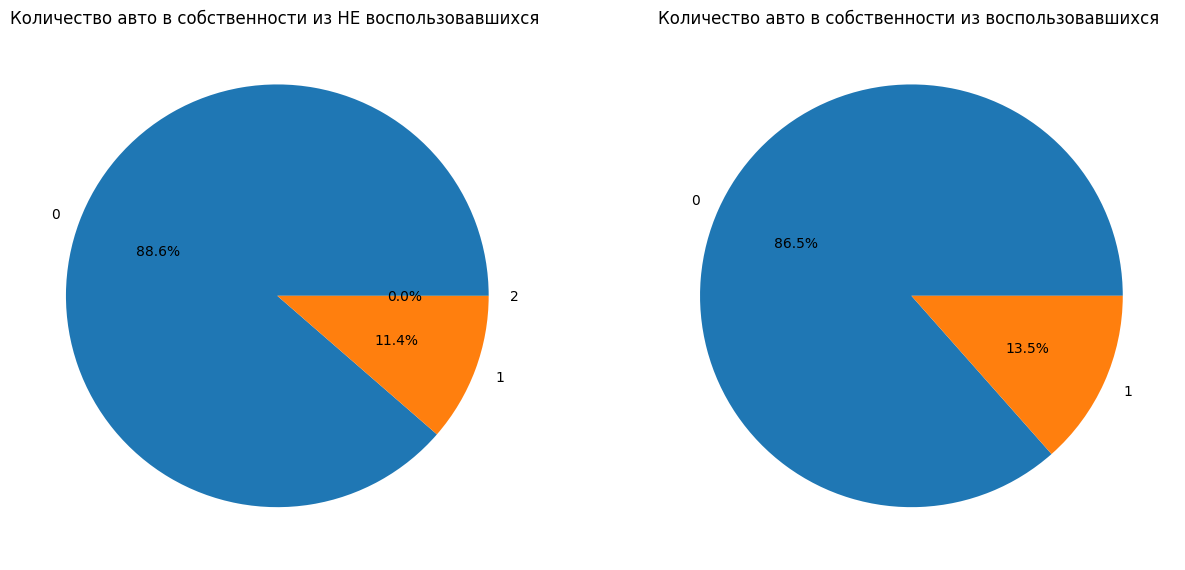

In [18]:
draw_pie(
    column_group= 'OWN_AUTO',
    title_plot= 'Количество авто в собственности'
    )

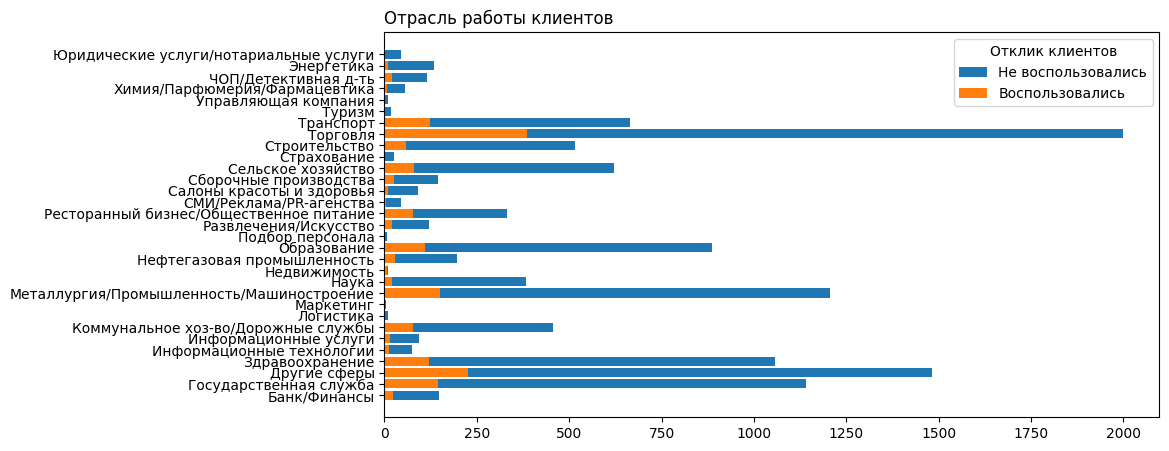

In [19]:
draw_barh(
    column_group= 'GEN_INDUSTRY', 
    title_plot= 'Отрасль работы'
    )

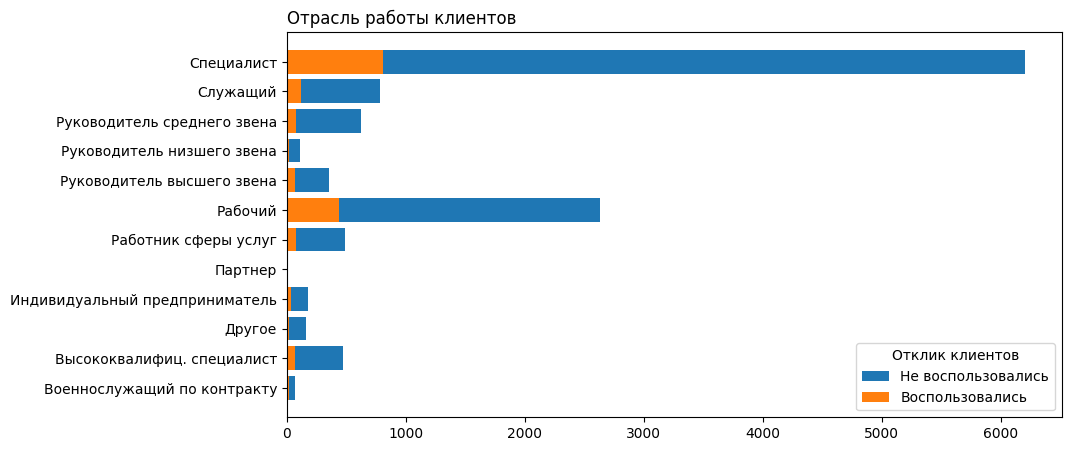

In [20]:
draw_barh(
    column_group= 'GEN_TITLE', 
    title_plot= 'Отрасль работы'
    )

In [23]:
# В колонке WORK_TIME выбросами считаю все значения больше 600 месяцев
# Заменяю их на медианное значение по занимаемой должности
for i in df.loc[df['WORK_TIME'] > 600].index:
    df['WORK_TIME'].iloc[i] = df.groupby('GEN_TITLE')['WORK_TIME'].median()[df['GEN_TITLE'].iloc[i]]

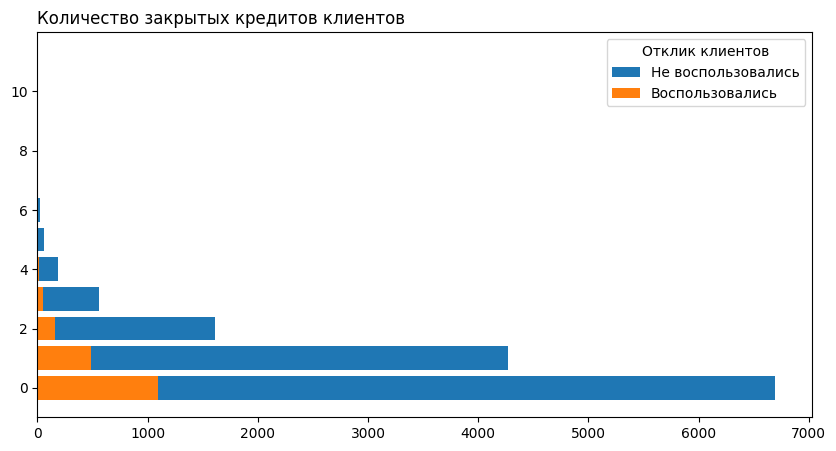

In [22]:
draw_barh(
    column_group= 'COUNT_CLOSED_LOAN', 
    title_plot= 'Количество закрытых кредитов'
    )

Выводы:
- пенсионеры и неработающие наименее активно откликаются на предложение банка
- предложениями больше пользуются те, у кого место жительства не совпадет с адресом регистрации
- больше всего предложений поступало тем, у кого нет кредита
